In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = "../output_video/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

<function matplotlib.pyplot.show(close=None, block=None)>

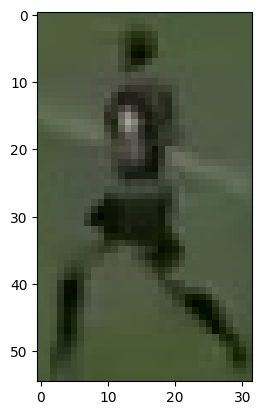

In [3]:
plt.imshow(image)
plt.show

# take the top half of image


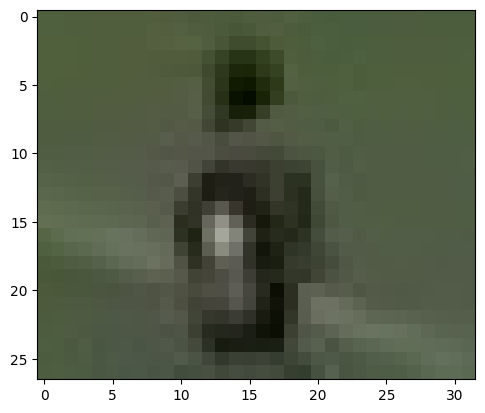

In [29]:
top_half_image = image[0 :int(image.shape[0] // 2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two cluster

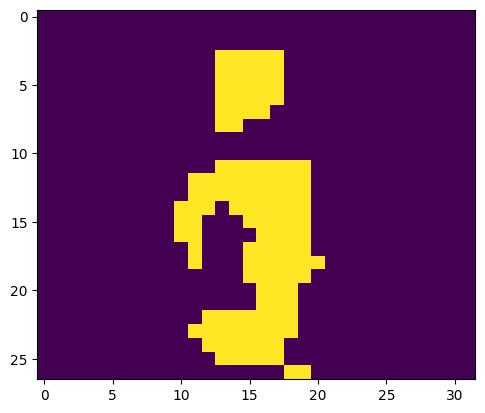

In [39]:
# reshape the image into 2d arrays
image_2d = top_half_image.reshape(-1, 3)

#perform k-means clustering with two clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the labels of the clusters
labels = kmeans.labels_

# reshape the labels to the original image shape

clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#display the clustered image
plt.imshow(clustered_image)
plt.show()

In [40]:
corner_cluster = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)
print(non_player_cluster)

0


In [41]:
player_cluster = 1-non_player_cluster
print(player_cluster)

1


In [42]:
kmeans.cluster_centers_[player_cluster]

array([41.232, 45.912, 30.584])